## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 0.01

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.036765
0:	learn: 0.9793830	total: 47.1ms	remaining: 47s
1:	learn: 0.9582303	total: 48ms	remaining: 24s
2:	learn: 0.9353695	total: 48.9ms	remaining: 16.2s
3:	learn: 0.9161608	total: 49.9ms	remaining: 12.4s
4:	learn: 0.8990488	total: 50.8ms	remaining: 10.1s
5:	learn: 0.8832373	total: 51.9ms	remaining: 8.59s
6:	learn: 0.8650817	total: 53.4ms	remaining: 7.58s
7:	learn: 0.8477194	total: 54.2ms	remaining: 6.72s
8:	learn: 0.8311338	total: 55ms	remaining: 6.05s
9:	learn: 0.8132347	total: 55.8ms	remaining: 5.52s
10:	learn: 0.7953546	total: 56.6ms	remaining: 5.08s
11:	learn: 0.7796915	total: 57.4ms	remaining: 4.72s
12:	learn: 0.7641617	total: 58.2ms	remaining: 4.42s
13:	learn: 0.7484061	total: 59.2ms	remaining: 4.17s
14:	learn: 0.7353909	total: 60ms	remaining: 3.94s
15:	learn: 0.7199546	total: 60.9ms	remaining: 3.74s
16:	learn: 0.7058790	total: 61.7ms	remaining: 3.57s
17:	learn: 0.6928959	total: 62.5ms	remaining: 3.41s
18:	learn: 0.6802797	total: 63.2ms	remaining: 3.26s
19

117:	learn: 0.2762157	total: 148ms	remaining: 1.1s
118:	learn: 0.2751476	total: 149ms	remaining: 1.1s
119:	learn: 0.2742685	total: 150ms	remaining: 1.1s
120:	learn: 0.2732505	total: 151ms	remaining: 1.09s
121:	learn: 0.2722779	total: 151ms	remaining: 1.09s
122:	learn: 0.2706818	total: 152ms	remaining: 1.08s
123:	learn: 0.2699505	total: 153ms	remaining: 1.08s
124:	learn: 0.2691699	total: 154ms	remaining: 1.08s
125:	learn: 0.2678759	total: 155ms	remaining: 1.07s
126:	learn: 0.2667829	total: 156ms	remaining: 1.07s
127:	learn: 0.2658124	total: 157ms	remaining: 1.07s
128:	learn: 0.2648855	total: 157ms	remaining: 1.06s
129:	learn: 0.2641466	total: 158ms	remaining: 1.06s
130:	learn: 0.2633410	total: 159ms	remaining: 1.05s
131:	learn: 0.2621334	total: 160ms	remaining: 1.05s
132:	learn: 0.2614823	total: 161ms	remaining: 1.05s
133:	learn: 0.2601560	total: 162ms	remaining: 1.04s
134:	learn: 0.2595334	total: 163ms	remaining: 1.04s
135:	learn: 0.2587113	total: 163ms	remaining: 1.04s
136:	learn: 0.2

278:	learn: 0.1808467	total: 286ms	remaining: 739ms
279:	learn: 0.1804819	total: 287ms	remaining: 738ms
280:	learn: 0.1800651	total: 288ms	remaining: 737ms
281:	learn: 0.1796570	total: 289ms	remaining: 735ms
282:	learn: 0.1792465	total: 290ms	remaining: 734ms
283:	learn: 0.1789390	total: 290ms	remaining: 732ms
284:	learn: 0.1785633	total: 291ms	remaining: 730ms
285:	learn: 0.1781925	total: 292ms	remaining: 729ms
286:	learn: 0.1777819	total: 293ms	remaining: 728ms
287:	learn: 0.1773282	total: 294ms	remaining: 726ms
288:	learn: 0.1769502	total: 295ms	remaining: 725ms
289:	learn: 0.1766256	total: 295ms	remaining: 723ms
290:	learn: 0.1762818	total: 296ms	remaining: 722ms
291:	learn: 0.1759812	total: 297ms	remaining: 720ms
292:	learn: 0.1756654	total: 298ms	remaining: 719ms
293:	learn: 0.1753518	total: 299ms	remaining: 718ms
294:	learn: 0.1750510	total: 300ms	remaining: 716ms
295:	learn: 0.1746660	total: 301ms	remaining: 715ms
296:	learn: 0.1743698	total: 301ms	remaining: 713ms
297:	learn: 

442:	learn: 0.1351545	total: 425ms	remaining: 535ms
443:	learn: 0.1349249	total: 426ms	remaining: 534ms
444:	learn: 0.1346373	total: 427ms	remaining: 533ms
445:	learn: 0.1343300	total: 428ms	remaining: 532ms
446:	learn: 0.1339775	total: 429ms	remaining: 531ms
447:	learn: 0.1336963	total: 430ms	remaining: 530ms
448:	learn: 0.1334275	total: 431ms	remaining: 529ms
449:	learn: 0.1332987	total: 432ms	remaining: 528ms
450:	learn: 0.1331067	total: 433ms	remaining: 527ms
451:	learn: 0.1328279	total: 434ms	remaining: 526ms
452:	learn: 0.1325780	total: 435ms	remaining: 525ms
453:	learn: 0.1323446	total: 437ms	remaining: 525ms
454:	learn: 0.1320852	total: 438ms	remaining: 524ms
455:	learn: 0.1318339	total: 439ms	remaining: 523ms
456:	learn: 0.1315433	total: 439ms	remaining: 522ms
457:	learn: 0.1313653	total: 440ms	remaining: 521ms
458:	learn: 0.1311582	total: 441ms	remaining: 520ms
459:	learn: 0.1311057	total: 442ms	remaining: 519ms
460:	learn: 0.1308018	total: 443ms	remaining: 518ms
461:	learn: 

605:	learn: 0.1058657	total: 564ms	remaining: 367ms
606:	learn: 0.1057348	total: 565ms	remaining: 366ms
607:	learn: 0.1056360	total: 566ms	remaining: 365ms
608:	learn: 0.1054397	total: 567ms	remaining: 364ms
609:	learn: 0.1052296	total: 568ms	remaining: 363ms
610:	learn: 0.1050978	total: 569ms	remaining: 362ms
611:	learn: 0.1049759	total: 570ms	remaining: 361ms
612:	learn: 0.1047950	total: 570ms	remaining: 360ms
613:	learn: 0.1046790	total: 571ms	remaining: 359ms
614:	learn: 0.1045934	total: 572ms	remaining: 358ms
615:	learn: 0.1045011	total: 573ms	remaining: 357ms
616:	learn: 0.1042943	total: 574ms	remaining: 356ms
617:	learn: 0.1041832	total: 575ms	remaining: 355ms
618:	learn: 0.1039080	total: 576ms	remaining: 354ms
619:	learn: 0.1037869	total: 576ms	remaining: 353ms
620:	learn: 0.1035367	total: 577ms	remaining: 352ms
621:	learn: 0.1033841	total: 578ms	remaining: 351ms
622:	learn: 0.1031655	total: 579ms	remaining: 350ms
623:	learn: 0.1030696	total: 580ms	remaining: 349ms
624:	learn: 

763:	learn: 0.0844346	total: 697ms	remaining: 215ms
764:	learn: 0.0843622	total: 698ms	remaining: 215ms
765:	learn: 0.0842870	total: 699ms	remaining: 214ms
766:	learn: 0.0841950	total: 700ms	remaining: 213ms
767:	learn: 0.0841282	total: 701ms	remaining: 212ms
768:	learn: 0.0840619	total: 702ms	remaining: 211ms
769:	learn: 0.0839081	total: 703ms	remaining: 210ms
770:	learn: 0.0837202	total: 703ms	remaining: 209ms
771:	learn: 0.0835524	total: 704ms	remaining: 208ms
772:	learn: 0.0834207	total: 705ms	remaining: 207ms
773:	learn: 0.0833597	total: 706ms	remaining: 206ms
774:	learn: 0.0832641	total: 707ms	remaining: 205ms
775:	learn: 0.0831532	total: 708ms	remaining: 204ms
776:	learn: 0.0831184	total: 708ms	remaining: 203ms
777:	learn: 0.0830331	total: 709ms	remaining: 202ms
778:	learn: 0.0829601	total: 710ms	remaining: 201ms
779:	learn: 0.0828086	total: 711ms	remaining: 200ms
780:	learn: 0.0826788	total: 712ms	remaining: 200ms
781:	learn: 0.0825667	total: 712ms	remaining: 199ms
782:	learn: 

923:	learn: 0.0694349	total: 834ms	remaining: 68.6ms
924:	learn: 0.0693576	total: 835ms	remaining: 67.7ms
925:	learn: 0.0692736	total: 836ms	remaining: 66.8ms
926:	learn: 0.0692230	total: 837ms	remaining: 65.9ms
927:	learn: 0.0690717	total: 838ms	remaining: 65ms
928:	learn: 0.0689558	total: 839ms	remaining: 64.1ms
929:	learn: 0.0688445	total: 840ms	remaining: 63.2ms
930:	learn: 0.0687669	total: 840ms	remaining: 62.3ms
931:	learn: 0.0686594	total: 841ms	remaining: 61.4ms
932:	learn: 0.0685558	total: 842ms	remaining: 60.5ms
933:	learn: 0.0684595	total: 843ms	remaining: 59.6ms
934:	learn: 0.0683523	total: 844ms	remaining: 58.6ms
935:	learn: 0.0682573	total: 844ms	remaining: 57.7ms
936:	learn: 0.0681048	total: 845ms	remaining: 56.8ms
937:	learn: 0.0680523	total: 846ms	remaining: 55.9ms
938:	learn: 0.0679057	total: 847ms	remaining: 55ms
939:	learn: 0.0678404	total: 848ms	remaining: 54.1ms
940:	learn: 0.0677592	total: 849ms	remaining: 53.2ms
941:	learn: 0.0676013	total: 849ms	remaining: 52.3

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

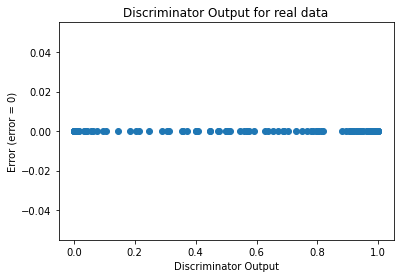

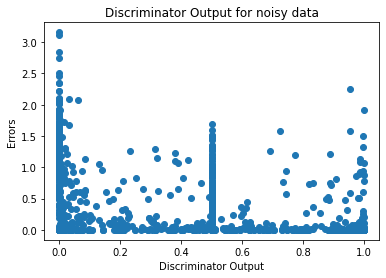

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)

# ABC - GAN Model with skip connection

In [14]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [15]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [16]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

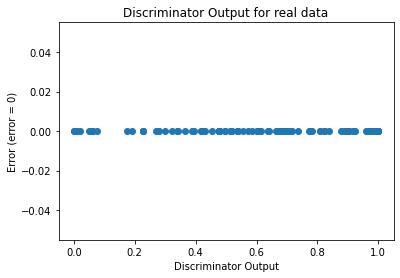

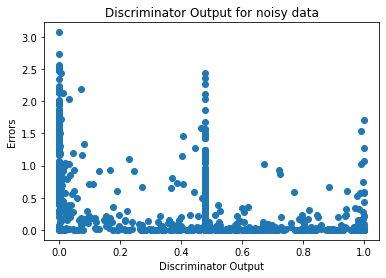

In [17]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [18]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9799]], device='cuda:0', requires_grad=True)
